<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#f0f0f0;">.....................
    <span style="font-family: Arial; font-weight:bold;font-size:3.2em;color:#a61652;">EDA Exam paper for 30 marks

-----

# 4 Questions X 2 Marks = 8 Marks

-------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#a61652;"> 1A). Read raw data = air-traffic-passenger.csv and look at the first 5 rows for a visual check?

In [2]:
Data_raw = pd.read_csv("air-traffic-passenger.csv")
Data = Data_raw.copy()
Data.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#a61652;"> 1B). Remove the column names ="GEO Region", "GEO Summary", "Activity Type Code","Terminal",'Operating Airline IATA Code',
       'Published Airline', 'Published Airline IATA Code'?

In [3]:
# dropping passed values 
Data.drop(["GEO Region", "GEO Summary", "Activity Type Code","Terminal",'Operating Airline IATA Code',
       'Published Airline', 'Published Airline IATA Code',], axis = 1,inplace = True) 

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#a61652;"> 2). Format the "Activity Period" to date type and  extract the year and month components.
    
#### Hint: format="%Y%m"?

In [4]:
Data.loc[:,"Activity Period"] = pd.to_datetime(Data.loc[:,"Activity Period"].astype(str), format="%Y%m")
Data.loc[:,"Year"] = Data["Activity Period"].dt.year
Data.loc[:,"Month"] = Data["Activity Period"].dt.month
Data.head(2)

,Activity Period,Operating Airline,Price Category Code,Boarding Area,Passenger Count,Year,Month
0,2005-07-01,ATA Airlines,Low Fare,B,27271,2005,7
1,2005-07-01,ATA Airlines,Low Fare,B,29131,2005,7


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#a61652;"> 3. Check for First Date, Last Date,Time range in days and Time range in months?

In [5]:
time_begin = Data.loc[:,"Activity Period"].min()
time_end = Data.loc[:,"Activity Period"].max()
time_range = time_end-time_begin

print("First date: ", str(time_begin)[:11])
print("Last date: ", str(time_end)[:11])
print("Time range in days:", time_range.days)
print("Time range in months:", time_range/np.timedelta64(1,"W"))

First date:  2005-07-01 
Last date:  2018-06-01 
Time range in days: 4718
Time range in months: 674.0


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#a61652;"> 4. Create a pivot_table for showing Top5 Biggest  Airline traffic generation?


In [6]:
Data_airline_yr = Data.groupby(["Year","Operating Airline"])["Passenger Count"].sum().divide(1000)
Data_airline_yr = Data_airline_yr.reset_index()
pivot_1 = Data_airline_yr.pivot_table(values="Passenger Count",index="Operating Airline",columns="Year", fill_value=0)
pivot_1.loc["United Airlines",:] = pivot_1.loc["United Airlines",:] + pivot_1.loc["United Airlines - Pre 07/01/2013",:]
pivot_1.drop("United Airlines - Pre 07/01/2013",axis=0, inplace=True)
pivot_1.head(3)

Year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Operating Airline,,,,,,,,,,,,,,
ABC Aerolineas S.A. de C.V. dba Interjet,0.00,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,15.585
ATA Airlines,277.54,105.796,1.362,0.066,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000
Aer Lingus,0.00,0.000,14.709,104.897,65.033,0.0,0.0,0.0,0.0,86.838,134.582,142.382,153.383,75.867


#### TOP 5 BIGGEST AIRLINES


In [7]:
avg_airline = pivot_1.mean(axis=1)
TOP5_airlines = avg_airline.nlargest(5).to_frame()
TOP5_airlines

,0
Operating Airline,
United Airlines,15571.737500
SkyWest Airlines,3184.454000
American Airlines,3115.884786
Virgin America,2703.137143
Delta Air Lines,2486.702357


--------

# 5 Questions X 3 Marks = 15 Marks

----------

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#a61652;">5.A) Read The Dataset(movies.csv) and Create a dataframe with the name: df_usa. (hint: data[data['country'] == 'USA'])(1 marks)

In [8]:
data = pd.read_csv('movies.csv', encoding='latin-1')
data.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [9]:
df_usa = data[data['country'] == 'USA']

In [10]:
df_usa.head(1)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#a61652;"> 5B). In df_usa dataframe Drop rows with 0 budget entry and also Check if the 0 budget films have been removed or not?(2 marks)

In [11]:
df_usa = df_usa[df_usa['budget'] != 0]

In [12]:
df_usa.describe()

,budget,gross,runtime,score,votes,year
count,3.726000e+03,3.726000e+03,3726.000000,3726.000000,3.726000e+03,3726.000000
mean,3.755996e+07,5.003118e+07,106.796028,6.291975,9.845608e+04,2002.117552
std,4.058167e+07,6.763871e+07,17.302558,0.999201,1.542955e+05,8.489054
min,7.000000e+03,3.090000e+02,69.000000,1.500000,4.480000e+02,1986.000000
25%,1.100000e+07,8.684645e+06,95.000000,5.700000,1.570200e+04,1995.000000
50%,2.500000e+07,2.777787e+07,103.000000,6.400000,4.519300e+04,2002.000000
75%,5.000000e+07,6.385394e+07,115.000000,7.000000,1.141595e+05,2009.000000
max,3.000000e+08,9.366622e+08,271.000000,9.300000,1.861666e+06,2016.000000


**Observation**: minimum budget is now around 7,000$. 

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#a61652;">6A).  Look at the evolution of mean budget and mean revenue over the years and Create a time series with mean revenue and budget per year?(2 marks)

In [13]:

df_usa_ts = df_usa.groupby(['year'], as_index=True)[['budget', 'gross', 'score' ]].mean() 

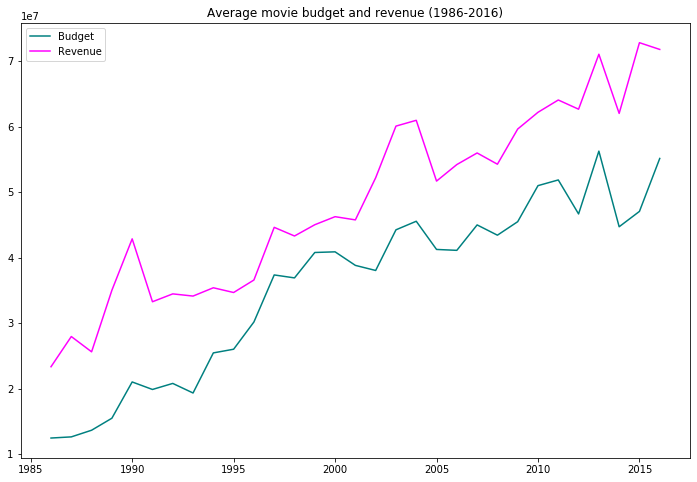

In [14]:
#Plot the time series of year, budget and revenue
plt.figure(figsize=(12,8))
plt.plot(df_usa_ts.index,df_usa_ts['budget'], label='Budget', color = 'teal')
plt.plot(df_usa_ts.index,df_usa_ts['gross'], label='Revenue', color = 'magenta')
plt.legend(loc='best')
plt.title("Average movie budget and revenue (1986-2016)")
plt.show()

**Observation**: increasing trend for both revenue and budget with a little drop in 2013.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#a61652;">6B). Plot the time series of year and score?(1 mark)

No handles with labels found to put in legend.


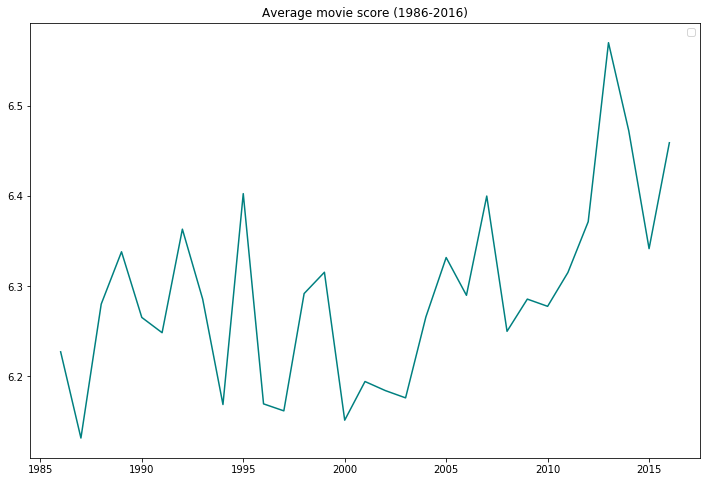

In [15]:

plt.figure(figsize=(12,8))
plt.plot(df_usa_ts.index,df_usa_ts['score'], color = 'teal')
plt.legend(loc='best')
plt.title("Average movie score (1986-2016)")
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#a61652;">7A). Barplot of revenue Vs genres and Observation?(2 marks)

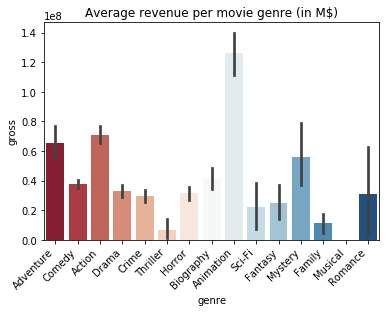

In [16]:
sns.barplot(x='genre',
            y='gross',
            data=df_usa,
            palette='RdBu')
plt.title('Average revenue per movie genre (in M$)')
plt.xticks(rotation=45,ha="right")
plt.show()

**Observation**: there seems to be only one observation for "Musical" genre.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#a61652;">7B)  Check the number of observations for "Musical" and create a new variable genre not equal to Musical ?(1 mark)

In [17]:
df_usa[df_usa['genre'] == 'Musical'].count()

budget      1
company     1
country     1
director    1
genre       1
gross       1
name        1
rating      1
released    1
runtime     1
score       1
star        1
votes       1
writer      1
year        1
dtype: int64

In [18]:
df_usa = df_usa[df_usa['genre'] != 'Musical']

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#a61652;">8A) Use that new variable and plot the  Boxplot of revenue Vs genres and write your observations ?(1 mark)

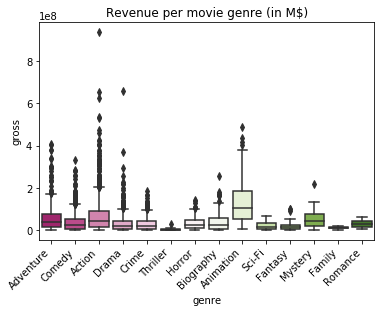

In [19]:
sns.boxplot(x='genre',
            y='gross',
            data=df_usa,
            palette='PiYG')
plt.title('Revenue per movie genre (in M$)')
plt.xticks(rotation=45,ha="right")
plt.show()


**Relationships between two categorical variables**

You may want to look at the relationships between two categorical variables. In such case, **crosstab** and **stacked barplots** are used.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#a61652;"> 8B) Create a crosstab showing rating repartition by genre(2 marks)

In [20]:
tab=pd.crosstab(df_usa['rating'], df_usa['genre'])
tab

genre,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Horror,Mystery,Romance,Sci-Fi,Thriller
rating,,,,,,,,,,,,,,
G,0,8,52,0,8,0,3,1,0,0,0,0,0,0
NC-17,0,0,0,0,3,1,1,0,0,0,0,0,0,0
NOT RATED,0,1,0,1,4,1,5,0,0,0,1,0,0,0
Not specified,0,0,0,0,0,0,1,0,0,0,0,0,0,0
PG,79,97,116,21,189,0,40,3,2,1,0,0,0,1
PG-13,409,63,8,47,455,32,229,0,3,44,9,3,7,0
R,404,53,5,86,482,253,299,0,20,144,12,0,1,6
UNRATED,0,0,0,1,5,1,4,0,0,0,0,0,0,0


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#a61652;">  9Create a stacked graph displaying the repartition of genre per content rating(3 marks)

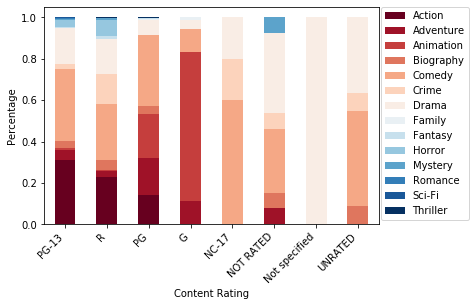

In [21]:
tab.div(tab.sum(1).astype(float), axis=0).sort_values(by='Action', ascending=False).plot(kind='bar', stacked=True, cmap="RdBu")
plt.xlabel("Content Rating")
plt.ylabel("Percentage")
plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45,ha="right")
plt.show()

--------

 # 1 Questions X 7 Marks = 7 Marks

------

## About This Data
This is a list of 10,000 women's shoes and their product information provided by Datafiniti's Product Database.

The dataset includes shoe name, brand, price, and more. Each shoe will have an entry for each price found for it and some shoes may have multiple entries.

Note that this is a sample of a large dataset. The full dataset is available through Datafiniti.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#a61652;">10A)Read the dataset(Data.Csv) Find the percentage of Missing values in each column of the dataset and Select only the columns with minimum number of missing values and drop all nan values?(3 marks)

In [22]:
df = pd.read_csv('Data.csv')
df.head()

,id,dateAdded,dateUpdated,asins,brand,categories,primaryCategories,colors,dimension,ean,...,prices.merchant,prices.offer,prices.returnPolicy,prices.shipping,prices.size,prices.sourceURLs,sizes,sourceURLs,upc,weight
0,AVpfEf_hLJeJML431ueH,2015-05-04T12:13:08Z,2018-01-29T04:38:43Z,NaN,Naturalizer,"Clothing,Shoes,Women's Shoes,All Women's Shoes...",Shoes,"Silver,Cream Watercolor Floral",NaN,NaN,...,Overstock.com,NaN,NaN,NaN,S,https://www.overstock.com/Clothing-Shoes/Women...,"6W,9W,7.5W,12W,8.5M,9N,9M,9.5M,10.5M,10W,8.5W,...",https://www.walmart.com/ip/Naturalizer-Danya-W...,017136472311,NaN
1,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,NaN,MUK LUKS,"Clothing,Shoes,Women's Shoes,Women's Casual Sh...",Shoes,Grey,NaN,3.397705e+10,...,Walmart.com,NaN,NaN,Standard,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,033977045743,NaN
2,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,NaN,MUK LUKS,"Clothing,Shoes,Women's Shoes,Women's Casual Sh...",Shoes,Grey,NaN,3.397705e+10,...,Slippers Dot Com,NaN,NaN,Value,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,033977045743,NaN
3,AVpjXyCc1cnluZ0-V-Gj,2017-01-27T01:25:56Z,2018-01-04T11:52:35Z,NaN,MUK LUKS,"Clothing,Shoes,Women's Shoes,All Women's Shoes...","Shoes,Shoes",Black,6.0 in x 6.0 in x 1.0 in,3.397705e+10,...,Slippers Dot Com,NaN,NaN,Value,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,033977045903,NaN
4,AVphGKLPilAPnD_x1Nrm,2017-01-27T01:25:56Z,2018-01-18T03:55:18Z,NaN,MUK LUKS,"Clothing,Shoes,Women's Shoes,All Women's Shoes...",Shoes,Grey,6.0 in x 6.0 in x 1.0 in,3.397705e+10,...,Walmart.com,NaN,NaN,Expedited,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,033977045958,NaN


In [23]:
df.isnull().sum()*100/df.shape[0]

id                       0.00
dateAdded                0.00
dateUpdated              0.00
asins                   99.97
brand                    0.00
categories               0.00
primaryCategories        0.00
colors                  73.69
dimension               98.83
ean                     93.29
imageURLs                0.00
keys                     0.00
manufacturer            94.73
manufacturerNumber      75.18
name                     0.00
prices.amountMax         0.00
prices.amountMin         0.00
prices.availability     95.66
prices.color             0.00
prices.condition        95.62
prices.currency          0.00
prices.dateAdded         7.77
prices.dateSeen          0.00
prices.isSale            0.00
prices.merchant         95.65
prices.offer            98.79
prices.returnPolicy    100.00
prices.shipping         95.88
prices.size              0.00
prices.sourceURLs        0.00
sizes                    0.00
sourceURLs               0.00
upc                      3.60
weight    

In [24]:
columns_name = ['brand', 'categories', 'name', 'prices.amountMax', 'prices.amountMin', 'prices.color', 'prices.isSale']
data = df[columns_name]
data.dropna(inplace=True)
data.head()

C:\Users\SHAMBHAVI\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,brand,categories,name,prices.amountMax,prices.amountMin,prices.color,prices.isSale
0,Naturalizer,"Clothing,Shoes,Women's Shoes,All Women's Shoes...",Naturalizer Danya Women N/S Open Toe Synthetic...,55.99,55.99,UWomens M Regular,False
1,MUK LUKS,"Clothing,Shoes,Women's Shoes,Women's Casual Sh...",MUK LUKS Womens Jane Suede Moccasin,47.00,35.25,Grey,True
2,MUK LUKS,"Clothing,Shoes,Women's Shoes,Women's Casual Sh...",MUK LUKS Womens Jane Suede Moccasin,35.25,35.25,Grey,False
3,MUK LUKS,"Clothing,Shoes,Women's Shoes,All Women's Shoes...",MUK LUKS Womens Dawn Suede Scuff Slipper,24.75,24.75,Black,False
4,MUK LUKS,"Clothing,Shoes,Women's Shoes,All Women's Shoes...",MUK LUKS Womens Dawn Suede Scuff Slipper,33.00,30.39,Grey,True


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#a61652;">10B). Split "categories" to simpler form,rename it and remove any symbols like "|" between the words  ?(4 marks)

**Hint =** 'Sports|Athletic|Running' rename as Sports Shoes

In [25]:
def categoriesReplacement(data):
    # Sandals
    data.loc[data['categories'].str.contains('Sandals'), 'categories'] = 'Sandals'
    # Baby & Kid
    data.loc[data['categories'].str.contains('Baby|Kids'), 'categories'] = "Baby&Kids"
    # Slippers
    data.loc[data['categories'].str.contains('Slippers'), 'categories'] = "Slippers"
    # Boots
    data.loc[data['categories'].str.contains('Boots'), 'categories'] = "Boots"
    # Home Shoes
    data.loc[data['categories'].str.contains('Home'), 'categories'] = "Home Shoes"
    # Sports Shoes
    data.loc[data['categories'].str.contains('Sports|Athletic|Running'), 'categories'] = "Sports Shoes"
    # Boat
    data.loc[data['categories'].str.contains('Boat'), 'categories'] = "Boat"
    # Oxford
    data.loc[data['categories'].str.contains('Oxford'), 'categories'] = "Oxford"
    # Dress Shoes
    data.loc[data['categories'].str.contains('Dress Shoes'), 'categories'] = "Dress Shoes"
    # Flats
    data.loc[data['categories'].str.contains('Flats'), 'categories'] = "Flats"
    # Loafers
    data.loc[data['categories'].str.contains('Loafers'), 'categories'] = "Loafers"
    # Clogs
    data.loc[data['categories'].str.contains('Clogs'), 'categories'] = "Clogs"
    # Pumps
    data.loc[data['categories'].str.contains('Pumps'), 'categories'] = "Pumps"
categoriesReplacement(data)

C:\Users\SHAMBHAVI\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [26]:
data.head()

,brand,categories,name,prices.amountMax,prices.amountMin,prices.color,prices.isSale
0,Naturalizer,Sandals,Naturalizer Danya Women N/S Open Toe Synthetic...,55.99,55.99,UWomens M Regular,False
1,MUK LUKS,"Clothing,Shoes,Women's Shoes,Women's Casual Sh...",MUK LUKS Womens Jane Suede Moccasin,47.00,35.25,Grey,True
2,MUK LUKS,"Clothing,Shoes,Women's Shoes,Women's Casual Sh...",MUK LUKS Womens Jane Suede Moccasin,35.25,35.25,Grey,False
3,MUK LUKS,Slippers,MUK LUKS Womens Dawn Suede Scuff Slipper,24.75,24.75,Black,False
4,MUK LUKS,Slippers,MUK LUKS Womens Dawn Suede Scuff Slipper,33.00,30.39,Grey,True


In [27]:
data.loc[data['categories'].str.contains("Casual Shoes|Women's Shoes|Womens,Rampage")]

,brand,categories,name,prices.amountMax,prices.amountMin,prices.color,prices.isSale
1,MUK LUKS,"Clothing,Shoes,Women's Shoes,Women's Casual Sh...",MUK LUKS Womens Jane Suede Moccasin,47.00,35.25,Grey,True
2,MUK LUKS,"Clothing,Shoes,Women's Shoes,Women's Casual Sh...",MUK LUKS Womens Jane Suede Moccasin,35.25,35.25,Grey,False
8,MUK LUKS,"Clothing,Shoes,Women's Shoes,All Women's Shoes",MUK LUKS Women's Malena Boot,59.00,39.88,Navy,True
15,MUK LUKS,"Clothing,Shoes,Women's Shoes,All Women's Shoes",MUK LUKS Women's Elle Wedge Sandals,50.00,28.91,Black,True
16,MUK LUKS,"Clothing,Shoes,Women's Shoes,All Women's Shoes",MUK LUKS Women's Elle Wedge Sandals,50.00,29.91,Black,True
17,MUK LUKS,"Clothing,Shoes,Women's Shoes,All Women's Shoes",MUK LUKS Women's Elle Wedge Sandals,50.00,22.53,Black,True
21,Sloggers,"Womens Shoes,Clothing,Women's Shoes,All Womens...",Sloggers Women's Outfitters Premium Garden Clog,32.44,32.44,Blue,False
24,Mo Mo,"Clothing,Shoes,Women's Shoes,All Women's Shoes",Mo Mo Women's Cami Studded Thong Sandal,24.00,13.88,BLACK,True
25,Mo Mo,"Clothing,Shoes,Women's Shoes,All Women's Shoes",MOMO Women's Low Heel Lace Up Bootie,24.00,24.00,Black,False
26,Mo Mo,"Clothing,Shoes,Women's Shoes,All Women's Shoes",Mo Mo Women's Outlander Heeled Hiker Boot,36.00,28.40,BUCKSKIN,True


In [28]:
data.loc[data['name'] == 'MUK LUKS Womens Jane Suede Moccasin', 'categories'] = "Loafers"
data.loc[data['name'].str.contains('Boot|Bootie|Boots|Booties'), 'categories'] = 'Boots'
data.loc[data['name'].str.contains('Sandals|Sandal'), 'categories'] = 'Sandals'
data.loc[data['name'].str.contains('Athletic|Canvas|Walk|Walking|New Balance'), 'categories'] = 'Sports Shoes'
data.loc[data['name'].str.contains('Pumps'), 'categories'] = 'Pumps'
data.loc[data['name'].str.contains('Flat|Flats'), 'categories'] = 'Flats'
data.loc[data['name'].str.contains('Clog'), 'categories'] = 'Clogs'
data.loc[data['name'].str.contains('Bear Paw Plush'), 'categories'] = 'Home Shoes'

In [29]:
data.head()

,brand,categories,name,prices.amountMax,prices.amountMin,prices.color,prices.isSale
0,Naturalizer,Sandals,Naturalizer Danya Women N/S Open Toe Synthetic...,55.99,55.99,UWomens M Regular,False
1,MUK LUKS,Loafers,MUK LUKS Womens Jane Suede Moccasin,47.00,35.25,Grey,True
2,MUK LUKS,Loafers,MUK LUKS Womens Jane Suede Moccasin,35.25,35.25,Grey,False
3,MUK LUKS,Slippers,MUK LUKS Womens Dawn Suede Scuff Slipper,24.75,24.75,Black,False
4,MUK LUKS,Slippers,MUK LUKS Womens Dawn Suede Scuff Slipper,33.00,30.39,Grey,True
